# AI 사례실습과 함께하는 '드래곤볼'을 찾아서, 모델최적화!
* 드래곤볼 7개를 모으면 3가지 선물이 주어진다고 합니다.
* AI 모델링 A부터 Z까지의 각 과정에 드래곤볼이 숨겨져있다고 하는데요.
* 우리는 이제 여섯 번째 마을 '모델최적화' 마을에 도착했습니다.
* 그럼, 지금부터 여섯 번째 드래곤볼을 찾아볼까요?

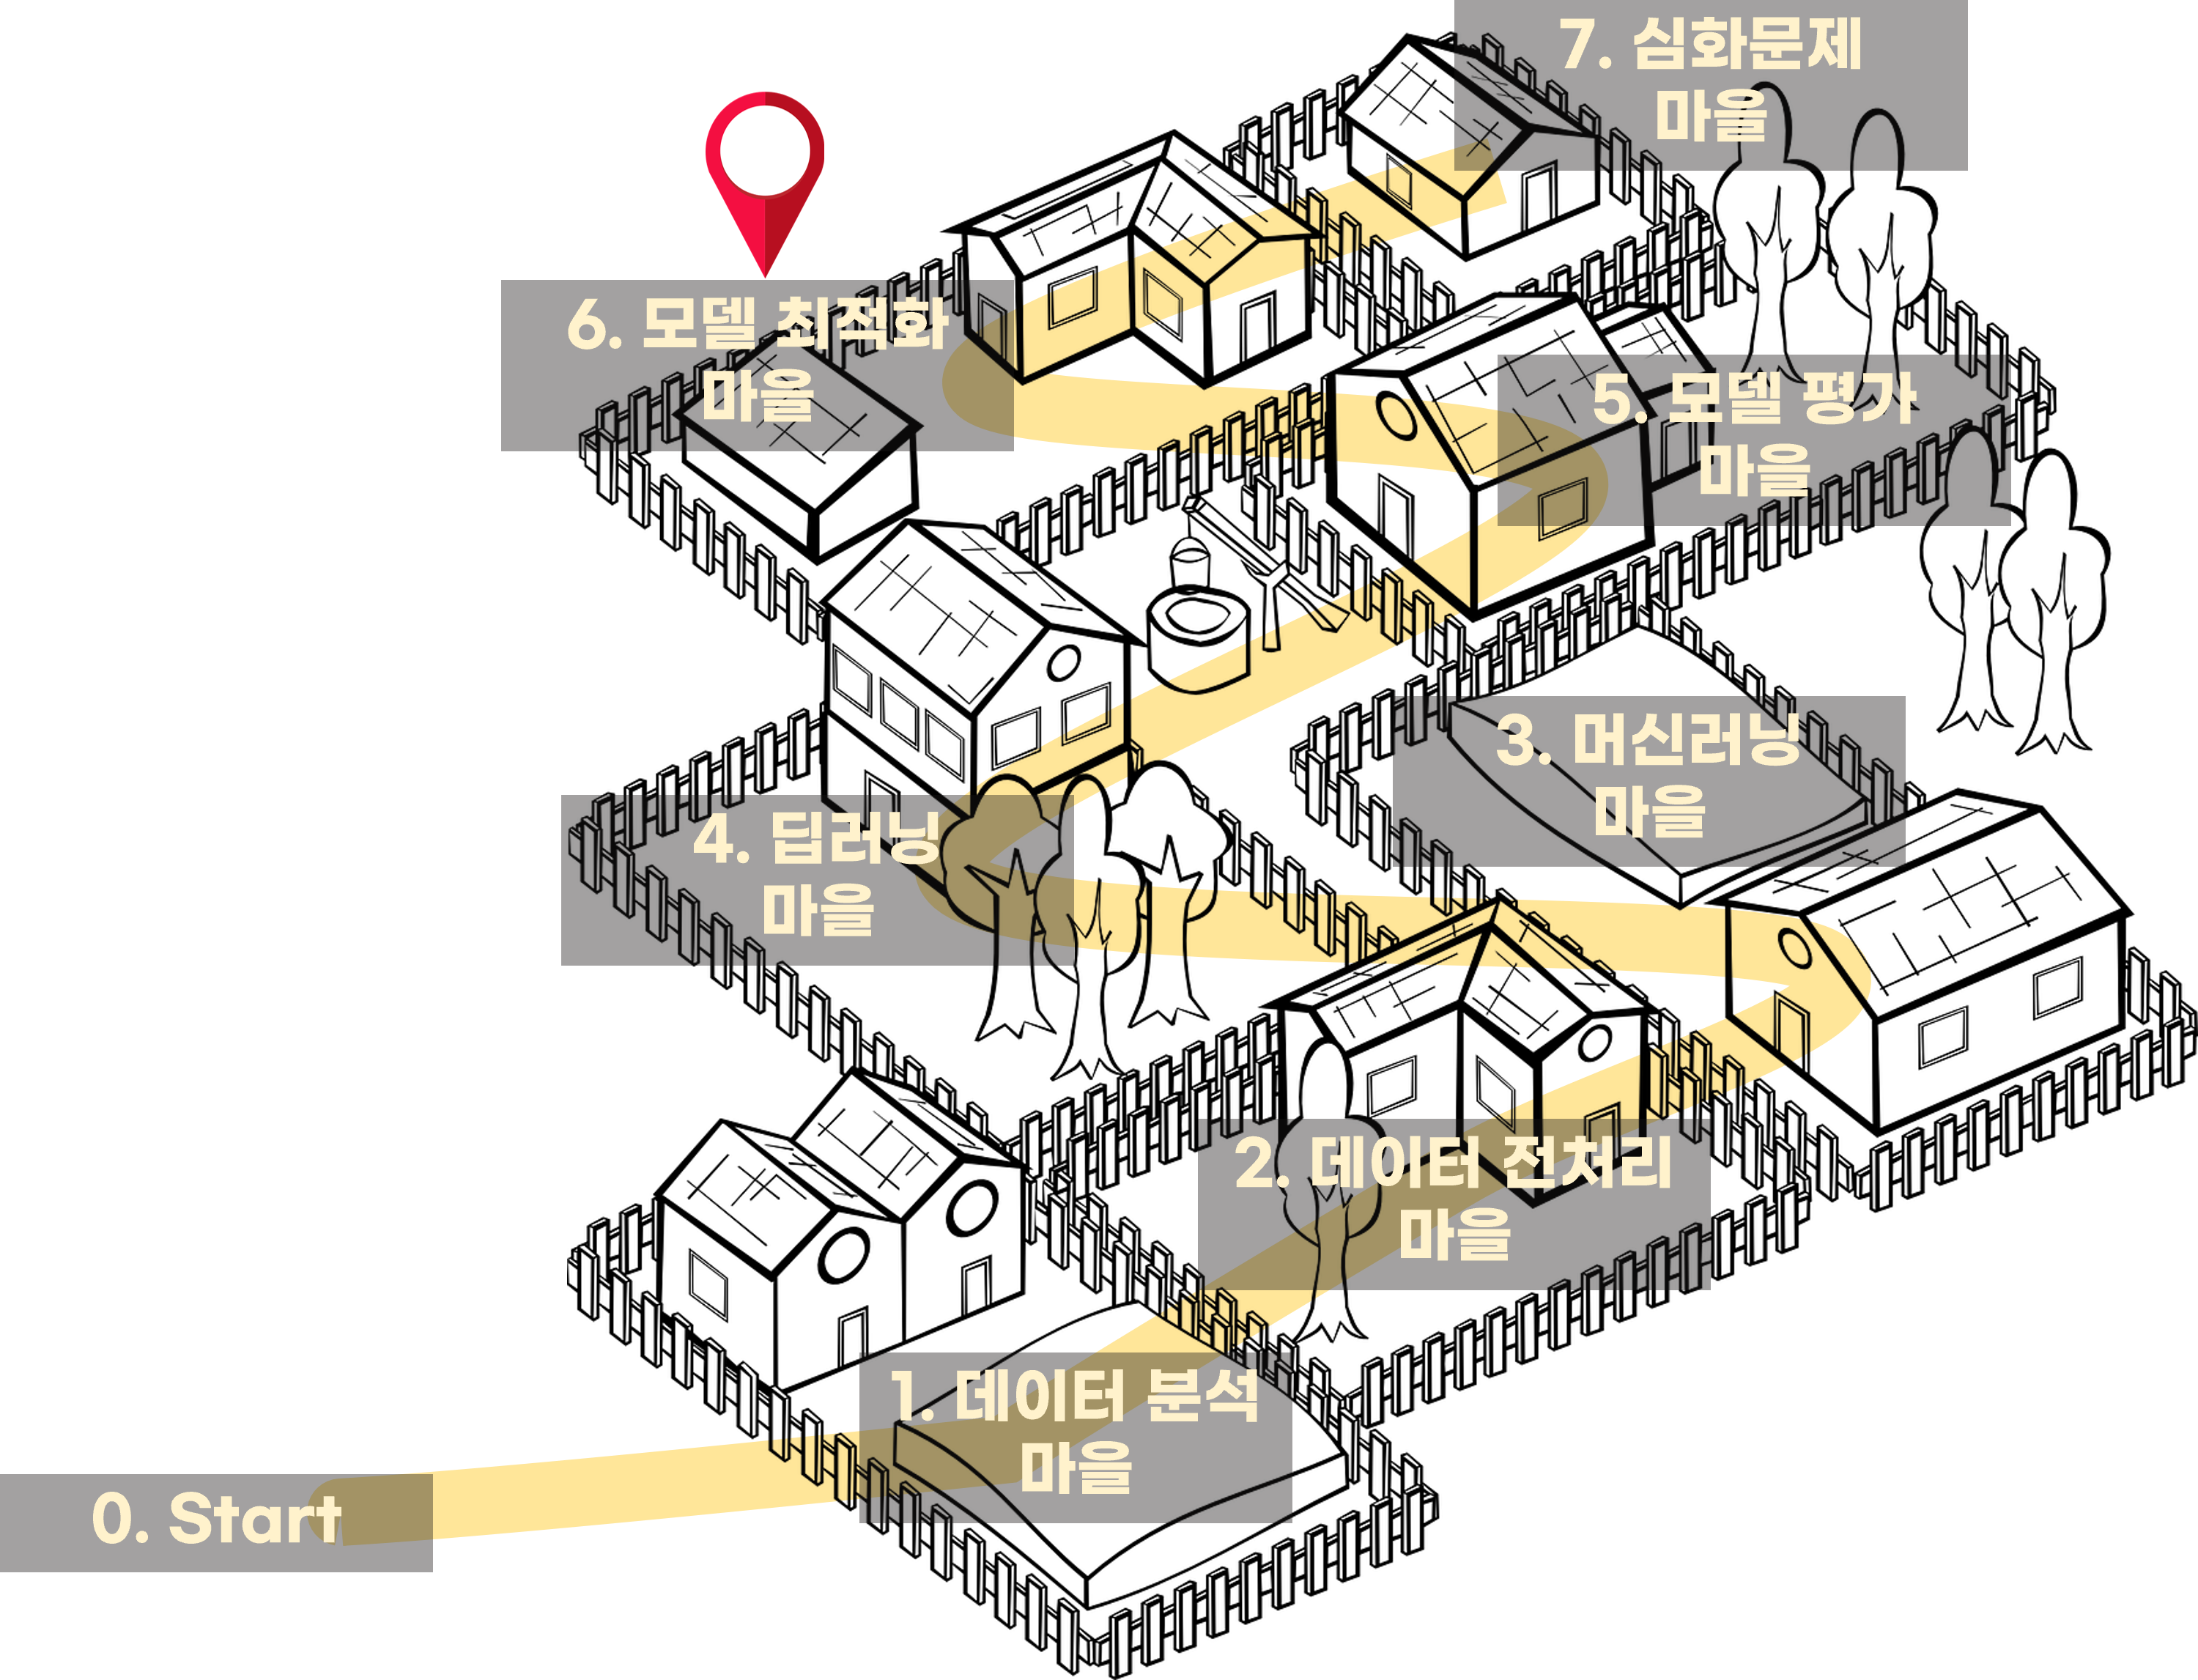

### [상황] 여섯 번째 드래곤볼을 찾아 보겠습니다. 
* 실습문제를 해결할 때마다 단서가 주어지는데요. 
* 이 단서를 기억해두었다가 마지막에 드래곤볼을 찾을 때 활용하시면 되요.

---

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas requests seaborn xgboost gspread oauth2client

In [2]:
# ID를 입력해주세요.
# ID는 aivle 이메일의 아이디 d로 시작하는 7글자(예를 들어 d011001)
ID = "a021018"

---

# (실습준비) 데이터 불러오기부터

In [ ]:
import pandas as pd

# 학습/평가 데이터 로딩
df_feature = pd.read_csv("add_data/onenavi_train_feature.csv",sep="|")
df_target = pd.read_csv("add_data/onenavi_train_target.csv",sep="|")

# 학습/평가 데이터 로딩
df_evaluation_target = pd.read_csv("add_data/onenavi_evaluation_et.csv",sep="|")
df_evaluation_feature = pd.read_csv("add_data/onenavi_evaluation_feature.csv",sep="|")

In [ ]:
### Train/Test Data Split
from sklearn.model_selection import train_test_split

# train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_feature, df_target, test_size=0.20, random_state=42)

# 1. 모델 최적화 : Hyperparameter Tuning
* Hyperparmeter는 머신러닝에서 모델을 학습하기 전에 설정해주는 옵션 값이라고 할 수 있습니다.
* 설정을 머신러닝이 스스로 찾을 수 있다면 참 좋을텐데
* 불가능하기 때문에 우리가 직접 찾아서 설정 해주어야 합니다.
* 모델을 최적화하는 전략은 크게 Panda전략과 Caviar전략으로 나누어볼 수 있는데요.

# 지금부터 모델 최적화를 시작합니다.

#### [실습문제1] 모델 최적화_1
* XGBoost를 기준으로 Panda전략에 따라 모델최적화를 하고 모델을 저장해주세요.
* random_state는 42로 학습시켜주세요.
* Test set의 R-squared Score는 0.718이 넘을 때까지 최적화를 해주세요.
* 최적화된 모델은 4_model.pkl로 저장해주세요.(폴더위치는 model입니다.)
* 단서 :Test set의 R-squared Score가 0.718이 넘었다면 Pass

In [7]:
# 아래에 실습코드를 작성하세요.
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [43]:
XGB_model = XGBRegressor(objective='reg:squarederror', random_state = 42, eta=0.1, reg_lambda=5,reg_alpha=5)

params = {
    'n_estimators' : [140, 150, 160],
    'gamma' : [0.5, 0.6],
    'max_depth' : [5],
}

XGB_model_GS = GridSearchCV(XGB_model, param_grid=params, scoring='r2', cv=3, verbose=2)

XGB_model_GS.fit(train_x, train_y)

XGB_pred = XGB_model_GS.predict(test_x)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...........gamma=0.5, max_depth=5, n_estimators=140; total time=  11.3s
[CV] END ...........gamma=0.5, max_depth=5, n_estimators=140; total time=  11.1s
[CV] END ...........gamma=0.5, max_depth=5, n_estimators=140; total time=  11.1s
[CV] END ...........gamma=0.5, max_depth=5, n_estimators=150; total time=  11.8s
[CV] END ...........gamma=0.5, max_depth=5, n_estimators=150; total time=  11.9s
[CV] END ...........gamma=0.5, max_depth=5, n_estimators=150; total time=  12.0s
[CV] END ...........gamma=0.5, max_depth=5, n_estimators=160; total time=  12.7s
[CV] END ...........gamma=0.5, max_depth=5, n_estimators=160; total time=  12.7s
[CV] END ...........gamma=0.5, max_depth=5, n_estimators=160; total time=  12.9s
[CV] END ...........gamma=0.6, max_depth=5, n_estimators=140; total time=  11.5s
[CV] END ...........gamma=0.6, max_depth=5, n_estimators=140; total time=  11.1s
[CV] END ...........gamma=0.6, max_depth=5, n_est

In [44]:
XGB_model_GS.best_params_

{'gamma': 0.5, 'max_depth': 5, 'n_estimators': 160}

In [45]:
XGB_model_GS.best_score_

0.7358383096070433

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
print("RMSE : ", round(mean_squared_error(test_y, XGB_pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, XGB_pred), 5))

RMSE :  275.84152
r2 score :  0.7181


In [48]:
import pickle
import joblib

In [49]:
joblib.dump(XGB_model_GS, './model/4_model.pkl')

['./model/4_model.pkl']

In [ ]:
# 단서1은 따로 적지 않으셔도 됩니다. '4_model.pkl'로 저장만 하시면 자동으로 체크합니다.

from sklearn.pipeline import Pipeline#### [실습문제2] 모델 최적화_2
* Gridsearch를 활용해서 Caviar전략에 따라 모델최적화를 하고 모델을 저장해주세요.
* random_state는 42로 학습시켜주세요.
* Test set의 R-squared Score는 0.718을 넘을 수 있는 파라미터를 찾아주세요.
* 최적 파라미터로 모델을 학습시켜주시고 최적화된 모델은 5_model.pkl로 저장해주세요.
* 단서 : Caviar 전략에 도움을 주는 라이브러리 이름은?(Hint : G로 시작하는 단어)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
# 아래에 실습코드를 작성하세요.
pipe = Pipeline([('regressor', None)])

param_grid = [
    {'regressor' : [LinearRegression()]},
    {'regressor': [GradientBoostingRegressor(learning_rate=0.1, random_state=42, max_depth=6, min_samples_split=40, min_samples_leaf=15)],
     'regressor__n_estimators': [130, 140, 150, 160, 170]}
]

Caviar_model_GS = GridSearchCV(pipe, param_grid=param_grid, scoring='r2', cv=3, verbose=2)

Caviar_model_GS.fit(train_x, train_y)

Caviar_pred = Caviar_model_GS.predict(test_x)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .......................regressor=LinearRegression(); total time=   4.2s
[CV] END .......................regressor=LinearRegression(); total time=   3.2s
[CV] END .......................regressor=LinearRegression(); total time=   3.4s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=130; total time=  12.2s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=130; total time=  11.8s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=130; total time=  12.1s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=140; total time=  12.9s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=140; total time=  12.8s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=140; total time=  13.0s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=150; total time=  15.2s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=150; total time=  14.2s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=150; total time=  13.9s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=160; total time=  14.8s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=160; total time=  14.8s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=160; total time=  14.9s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=170; total time=  15.8s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=170; total time=  15.8s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END regressor=GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                          min_samples_split=40, random_state=42), regressor__n_estimators=170; total time=  15.5s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
GB_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=5,min_samples_split=30,min_samples_leaf=15,random_state=42)

GB_model.fit(train_x, train_y)

GB_pred = GB_model.predict(test_x)

In [18]:
Caviar_model_GS.best_params_

{'regressor': GradientBoostingRegressor(max_depth=6, min_samples_leaf=15,
                           min_samples_split=40, n_estimators=170,
                           random_state=42),
 'regressor__n_estimators': 170}

In [19]:
print("RMSE : ", round(mean_squared_error(test_y, Caviar_pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, Caviar_pred), 5))

RMSE :  275.48741
r2 score :  0.71882


In [72]:
joblib.dump(Caviar_model_GS, './model/5_model.pkl')

['./model/5_model.pkl']

In [25]:
# 아래에 단서를 적어주세요.
단서2 = "GridSearchCV"# 단서2를 적어주세요.(문자형으로 적어주세요.)

# 2. 모델 평가

#### [실습문제3] 모델 예측 결과 비교하기
* 최적화를 통해 저장된 모델과 앞서 실습한 모델을 상호 비교해보세요.
* 기준은 ETAA를 계산하고 그 평균으로 비교를 합니다. 이를 위해서 함수 'calculation_etaa'를 정의하고 활용해주세요.
* 그리고 각 모델이 예측한 ETAA의 표준편차도 구해주세요.
* 각 모델의 평균과 표준편차를 정리해주세요.
* 단서 : 최적화한 모델(Panda, Caviar) 중 하나는 평가데이터에 적용했을 때, ETAA 평균 82.5보다 개선되어야 합니다.

In [71]:
#'calculation_etaa'함수 정의
def calculation_etaa(et, eta):
    etaa = (1-(abs(et-eta)/et))*100.0
    etaa[(etaa < 0)] = 0
    return etaa

In [93]:
import numpy as np

In [98]:
# 아래에 실습코드를 작성하세요.

et = np.array(test_y['ET'])
Panda_eta = np.array(XGB_pred)
Caviar_eta = np.array(Caviar_pred)

Panda_ETAA = calculation_etaa(et, Panda_eta)
Caviar_ETAA =  calculation_etaa(et, Caviar_eta)

print("Panda mean : ", np.mean(Panda_ETAA), ", std : ", np.std(Panda_ETAA))
print("Caviar mean : ", np.mean(Caviar_ETAA), ", std : ", np.std(Caviar_ETAA))

Panda mean :  80.4745771059046 , std :  17.506744992913745
Caviar mean :  80.46142647772488 , std :  17.513972062132545


In [ ]:
# 각 모델의 ETAA 평균과 표준편차를 정리하세요.
# Panda : 
# Caviar :

In [ ]:
# 단서3는 따로 적지 않으셔도 됩니다. 조건에 부합하면 자동으로 체크합니다.

---

### [드래곤볼을 찾아라] 주어진 단서를 모아서 드래곤볼을 찾아보겠습니다.
* 소스코드 실행 후 드래곤볼 이미지 창이 열리고 "드래곤볼을 찾았습니다."라는 문구가 출력된다면 여러분은 드래곤볼을 찾은 거랍니다.

In [99]:
# 단서를 모두 모았다면 드래곤볼을 찾아봅시다! 아래 소스코드를 실행해 주세요.
import module

module.sixthModule(ID, 단서2)

단서1 정답
단서2 정답
단서3 정답
드래곤볼을 획득했습니다.


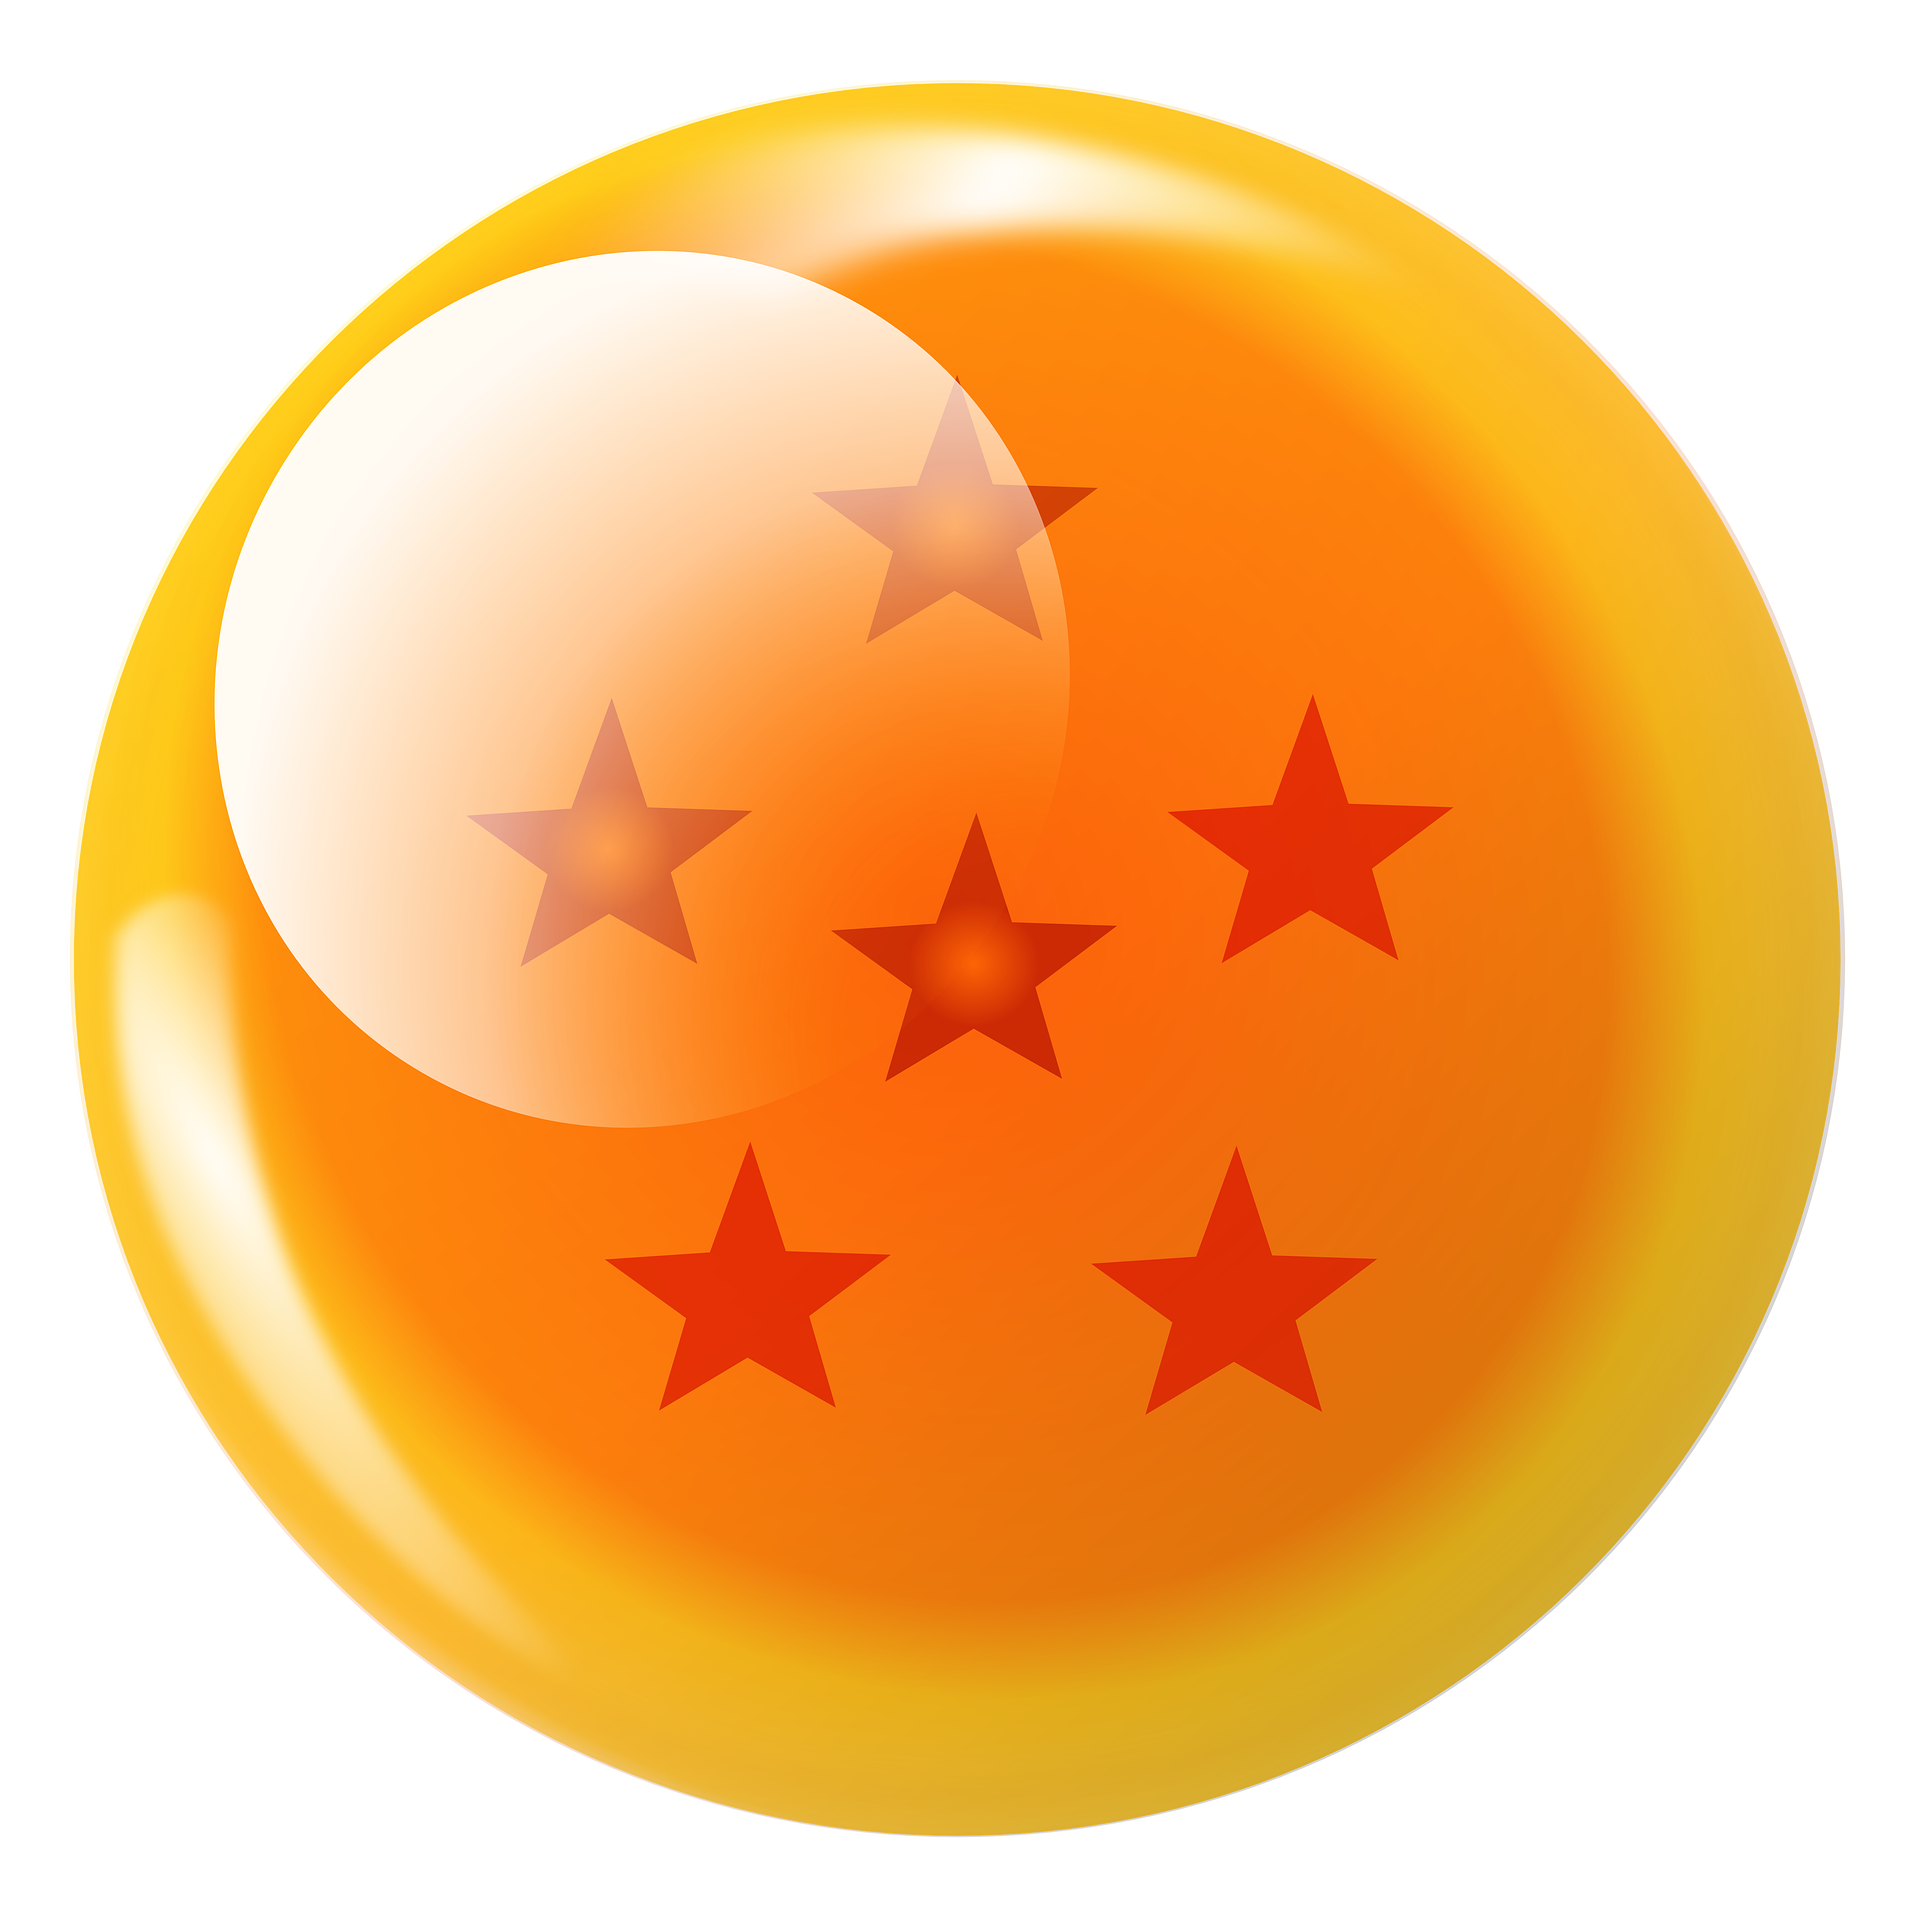

In [100]:
# 확인
from IPython.display import Image
Image("./dragonball/6성구.png", width=300, height=300)